# Advanced Data Analysis - Week 1 and 2 exercises

This notebook contains additional exercises for the topics addressed in week 1 and 2.

This was the **Assignment 1** of 2022/23.

The topic of the exercises consists in performing multiple analysis on weather information, more specifically information about temperature and precipitation.

The data in the dataset provided was obtained from NOAA ([https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html)).




[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>


### Preliminaries

Just import the libraries that will be needed throughout the assignment.

In [1]:
# imports pandas
import pandas as pd

import os
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(10,7)


## Datasets

For solving the questions posed, you have the following datasets available.

### Weather dara

File ```assignment1/weather.csv``` contains the information about the weather in a set of weather stations located around the world. The dataset includes the following columns:
* date, a date in the format year-month-day (e.g. 1995-01-31):
* id, the id of the weather station;
* tmax, the maximum temperature registered in the given day and weather station (in tenth of degrees);
* tmin, the minimum temperature registered in the given day and weather station (in tenth of degrees);
* prcp, the percipitation registered in the given day and weather station;

The dataset does not includes data for all stations for all the dates - while for some stations, data starts in 1950, for others stations it is available only is shorter intervals; even for stations for which data is available from 1950, the data is missing for some days.

File ```assignment1/stations.csv``` contains information about weather stations. The dataset includes the following columns:
* id, the id of the weather stations;
* lat, the latitude of the stations;
* lon, the longitude of the stations;
* alt, the altitude of the stations;
* name, with the name of the weather station;
* cid, with the code id for the country;


File ```assignment1/regions.csv``` contains information about regions. The dataset includes the following columns:
* region, with the region in which the country is located;
* country, the country name;
* cid, with the code id for the country.


The following given code loads the datasets.


In [2]:
dataFileName = os.path.join( "data", "weather2.csv")

dataDF = pd.read_csv(dataFileName)
dataDF["date"] = pd.to_datetime(dataDF["date"], format="%Y-%m-%d")

print(dataDF.head(5))

            id       date  tmax  tmin  prcp
0  AG000060390 1950-01-01   162    80    91
1  AG000060390 1950-01-02   129    74   153
2  AG000060390 1950-01-03   138    70     0
3  AG000060390 1950-01-04   163    68     0
4  AG000060390 1950-01-05   172    57     0


In [3]:
stationsFileName = os.path.join( "data", "stations.csv")

stationsDF = pd.read_csv(stationsFileName)

print(stationsDF.head(5))

            id      lat      lon     alt                   name cid
0  ACW00011604  17.1167 -61.7833    10.1  ST JOHNS COOLIDGE FLD  AC
1  ACW00011647  17.1333 -61.7833    19.2               ST JOHNS  AC
2  AE000041196  25.3330  55.5170    34.0    SHARJAH INTER. AIRP  AE
3  AF000040930  35.3170  69.0170  3366.0           NORTH-SALANG  AF
4  AG000060390  36.7167   3.2500    24.0     ALGER-DAR EL BEIDA  AG


In [4]:
regionsFileName = os.path.join( "data", "regions.csv")

regionsDF = pd.read_csv(regionsFileName)

print(regionsDF.head(5))

          region               country cid
0  North America         United States  US
1    Middle East  United Arab Emirates  AE
2         Africa              Ethiopia  ET
3         Africa               Algeria  AG
4           Asia            Kazakhstan  KZ


## Question 1 (6 points)

In this question, we start by exploring the data available with simple queries. In you answers, you can use the data computed in the previous one, when usefull.


### **1.a)** What are the three highest and lowest temperatures and the maximum precipitation registered, when and in which station were they registered?


In [5]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

highest = dataDF.nlargest(3,"tmax") 
print( "Highest tempertature")
print( highest)
lowest = dataDF.nsmallest(3,"tmin") 
print( "Lowest tempertature")
print( lowest)
maximum = dataDF.nlargest(3,"prcp") 
print( "Maximum precipitation")
print( maximum)



Highest tempertature
                  id       date  tmax  tmin  prcp
1206314  KU000405820 1998-08-20   513   292     0
1204170  KU000405820 1990-07-25   512   367     0
1205317  KU000405820 1995-08-14   510   281     0
Lowest tempertature
                 id       date  tmax  tmin  prcp
258764  CA003050520 1950-01-25  -244  -512     0
258741  CA003050520 1950-01-02  -283  -461     0
279066  CA004057120 1950-01-25  -367  -461     0
Maximum precipitation
                  id       date  tmax  tmin  prcp
1706892  SA000041024 1978-04-05   335   249  7780
1706993  SA000041024 1978-07-15   390   302  7780
1706994  SA000041024 1978-07-16   396   302  7780


### 1.b) Print the information for the top-3 days with the highest and lowest temperature and the maximum precipitation in station PO000008535 (Lisbon).


In [6]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

highest = dataDF[dataDF["id"]=="PO000008535"].nlargest(3,"tmax") 
print( "Highest tempertature")
print( highest)
lowest = dataDF[dataDF["id"]=="PO000008535"].nsmallest(3,"tmin") 
print( "Lowest tempertature")
print( lowest)



Highest tempertature
                  id       date  tmax  tmin  prcp
1515468  PO000008535 2018-08-04   420   281     0
1502268  PO000008535 1981-06-13   415   219     0
1505954  PO000008535 1991-07-17   406   246     0
Lowest tempertature
                  id       date  tmax  tmin  prcp
1492278  PO000008535 1954-02-05   115    -9     0
1493014  PO000008535 1956-02-11    68    -8     0
1493015  PO000008535 1956-02-12   100    -8     0


### 1.c) For Lisbon, how many days had maximum temperature higher or equal to 30ºC, per year, since 1970?

**NOTE:** in a DataFrame ```df```, with column ```d``` with a datetime, it is possible to access the year with ```df["d"].dt.year```.


In [7]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

dataDF["year"] = dataDF["date"].dt.year
days = dataDF[(dataDF["id"]=="PO000008535") & (dataDF["year"] >= 1970) & (dataDF["tmax"] >= 300)][["date","year"]].groupby("year").count()
print(days)


      date
year      
1970    26
1971    17
1972     8
1973    22
1974    33
1975    18
1976    25
1977    16
1978    28
1979    20
1980    28
1981    31
1982    20
1983    20
1984    26
1985    26
1986    21
1987    38
1988    22
1989    36
1990    26
1991    43
1992    28
1993    23
1994    15
1995    24
1996    27
1997    21
1998    27
1999    22
2001    19
2002    15
2003    33
2004    28
2005    34
2006    41
2007    22
2008    17
2009    33
2010    41
2011    22
2012    27
2013    37
2014    13
2015    30
2016    46
2017    40
2018    33
2019    28
2021     1
2022    32


### 1.d) Print information about the top-10 days with the largest temperature difference?


In [8]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

dataDF["tdif"] = dataDF["tmax"] - dataDF["tmin"]
diffs = dataDF.nlargest(10,"tdif") 
print( "Highest tempertature")
print( diffs)


Highest tempertature
                  id       date  tmax  tmin  prcp  year  tdif
362484   CA008103100 1951-02-07   117  -250     8  1951   367
300894   CA006105976 1950-03-04    17  -339     0  1950   356
288881   CA004057120 1976-12-10    22  -328     0  1976   350
378097   CA008103100 1994-01-28    95  -250   103  1994   345
1206923  KZ000035188 1951-02-17   -50  -395    10  1951   345
1287287  MG000044272 1988-02-24   102  -239     0  1988   341
304093   CA006105976 1958-12-22    17  -322    36  1958   339
370817   CA008103100 1974-01-21    72  -267    38  1974   339
304145   CA006105976 1959-02-12    28  -306     0  1959   334
323805   CA006105976 2013-01-18    98  -235    62  2013   333


### 1.e) Find maximum values for all weather stations

For all weather stations, print their respective highest temperature, lowest temperature and maximum precipitation since 1970.


In [9]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

maxs = dataDF.groupby("id").agg({"tmax":"max","tmin":"min","prcp":"max"})

print(maxs)


             tmax  tmin  prcp
id                           
AG000060390   475   -33  1366
AR000087129   456   -85  4630
ASN00009021   467   -13  1320
ASN00040214   412    27  3140
ASN00066037   464     1  2162
...           ...   ...   ...
USC00224265   406  -233  1816
USW00014732   417  -194  1727
USW00023174   433   -11  1422
USW00024233   422  -178  1275
USW00092811   367     0  2794

[130 rows x 3 columns]


## Question 2 (5 points)

This second question focus on processing the information on a time series for plotting it.


### 2.a) Display the information about temperatures and precipitation for a single station of your choice from 2018 to 2019.

Plot the information about temperatures and percipitation in some selected station from 2018 to 2019. In your answer consider that it would be useful to have access not only to the raw data but also to observe the trend of temperature variability over the year, without being too impacted by the natural day-to-day variability.

In the rationale of your solution, discuss the parameters used to smooth the lines.


<Axes: xlabel='date', ylabel='tmin'>

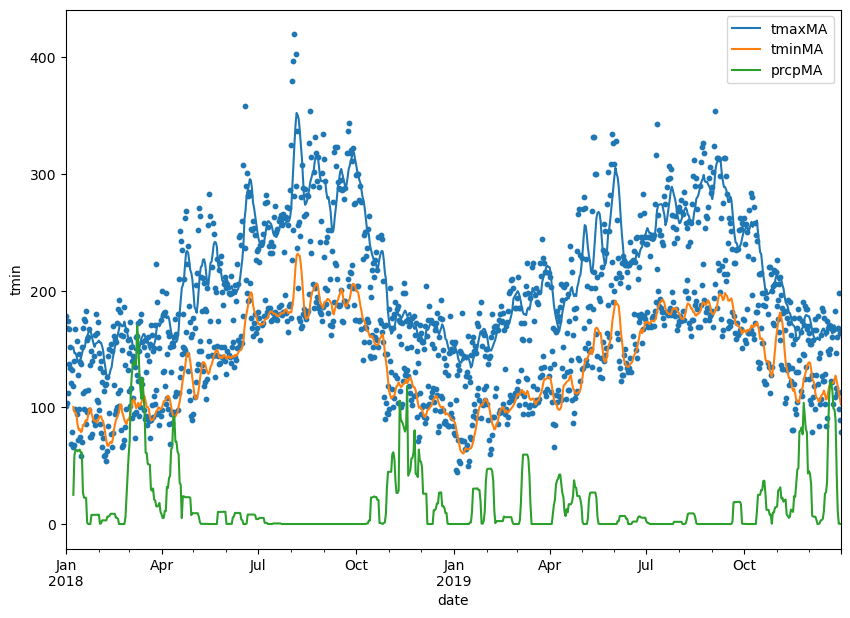

In [10]:
#Solve question here. Briefly justy you solution in the following markdown cell.


fig, axis = plt.subplots()


data2DF = dataDF[(dataDF["id"]=="PO000008535")&(dataDF["date"]>="2018-01-01")&(dataDF["date"]<="2019-12-31")].copy()
data2DF["tmaxMA"] = data2DF["tmax"].rolling(8,center=False).mean()
data2DF["tminMA"] = data2DF["tmin"].rolling(8,center=False).mean()
data2DF["prcpMA"] = data2DF["prcp"].rolling(8,center=False).mean()
data2DF.plot(ax=axis, x="date",y="tmaxMA")
data2DF.plot(ax=axis, x="date",y="tmax",kind="scatter",s=10)
data2DF.plot(ax=axis, x="date",y="tminMA")
data2DF.plot(ax=axis, x="date",y="tmin",kind="scatter",s=10)
data2DF.plot(ax=axis, x="date",y="prcpMA")


**Rationale:** to be completed

### 2.b) Display long-term trends.

In this question we want to verify the long term trends. In particular, we want to know whether the average temperature or difference between maximum and minimum temperature has been increasing over the years or the precipiation has been descreasing in the full period for which data is available, without being too much impacted by the natural variability over each year. 

NOTE: compute the average temperature in a day as the average between the maximum and minimum temperatures of that day.

Select 2 weather stations in different continents, compute the necessary data and plot it.

<Axes: xlabel='date'>

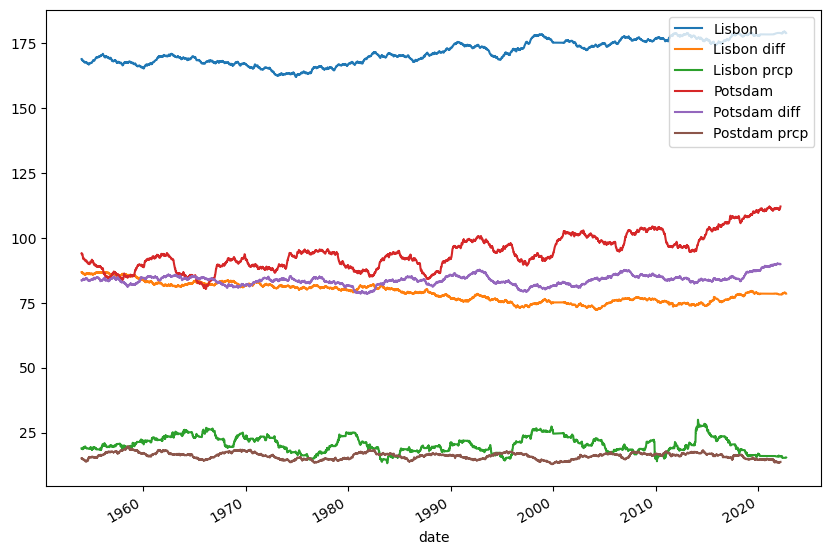

In [11]:
#Solve question here. Briefly justy you solution in the following markdown cell.

fig, axis = plt.subplots()

data2DF = dataDF[(dataDF["id"]=="PO000008535")].copy()
data2DF["tavg"] = data2DF["tmin"] + ((data2DF["tmax"] - data2DF["tmin"]) / 2 ) 
data2DF["tdif"] = (data2DF["tmax"] - data2DF["tmin"]) 
data2DF["tavgMA"] = data2DF["tavg"].rolling(1461,center=False).mean()
data2DF["tdifMA"] = data2DF["tdif"].rolling(1461,center=False).mean()
data2DF["prcpMA"] = data2DF["prcp"].rolling(1461,center=False).mean()
data2DF.plot(ax=axis,x="date",y="tavgMA",label="Lisbon")
data2DF.plot(ax=axis,x="date",y="tdifMA",label="Lisbon diff")
data2DF.plot(ax=axis,x="date",y="prcpMA",label="Lisbon prcp")


data2DF = dataDF[(dataDF["id"]=="GM000003342")].copy()
data2DF["tavg"] = data2DF["tmin"] + ((data2DF["tmax"] - data2DF["tmin"]) / 2 ) 
data2DF["tdif"] = (data2DF["tmax"] - data2DF["tmin"]) 
data2DF["tavgMA"] = data2DF["tavg"].rolling(1461,center=False).mean()
data2DF["tdifMA"] = data2DF["tdif"].rolling(1461,center=False).mean()
data2DF["prcpMA"] = data2DF["prcp"].rolling(1461,center=False).mean()
data2DF.plot(ax=axis,x="date",y="tavgMA",label="Potsdam")
data2DF.plot(ax=axis,x="date",y="tdifMA",label="Potsdam diff")
data2DF.plot(ax=axis,x="date",y="prcpMA",label="Postdam prcp")


**Rationale:** to be completed

## Question 3 (4 points)

This third question focus on understanding the relations between weather elements.


### 3.a) Is there any relation between different weather elements for a given city?

For a given weather station, let's start by investigating if there is a relation between the different weather elements.



In [12]:
#Solve question here. Briefly justy you solution in the following markdown cell.

lisbon = dataDF[(dataDF["id"]=="PO000008535")][["tmax","tmin","prcp"]].copy()

print( lisbon.corr())

          tmax      tmin      prcp
tmax  1.000000  0.802520 -0.209511
tmin  0.802520  1.000000 -0.089456
prcp -0.209511 -0.089456  1.000000


**Present an interpretation of the results here:** to be completed

### 3.b) Is there a relation between weather elements in different cities?

Select three cities, two of which you believe have similar weather and other with different weather and use the studied methods to confirm you intuitions (or not) for the different weather elements.

In the Markdown cell below your code, comment the results obtained.



In [13]:
#Solve question here. Briefly justy you solution in the following markdown cell.

lisbon = dataDF[(dataDF["id"]=="PO000008535")].copy()
lisbon["tempMA"] = lisbon["tmax"].ewm(com=0.1).mean()

rome = dataDF[(dataDF["id"]=="GM000003342")].copy()
rome["tempMA"] = rome["tmax"].ewm(com=0.1).mean()

sydney = dataDF[(dataDF["id"]=="ASN00066062")].copy()
sydney["tempMA"] = sydney["tmax"].ewm(com=0.1).mean()

print( "Correlation between Lisbon and Roma = " +\
      str(lisbon[["date","tmax"]].set_index("date").corrwith(rome[["date","tmax"]].set_index("date"),drop=True)[0]))
print( "Correlation between Lisbon and Sydney = " +\
      str(lisbon[["date","tmax"]].set_index("date").corrwith(sydney[["date","tmax"]].set_index("date"),drop=True)[0]))



Correlation between Lisbon and Roma = 0.716515282801141
Correlation between Lisbon and Sydney = -0.5651910166644869


**Rationale and comments:**

## Question 4 (5 points)

This fourth question focus on doing analysis at a country or region-scale.
.

### 4.a) Display the higest and lowest temperature and highest percipitation in each region


In [14]:
# Generic data to be used in the following questions
extData = dataDF.join( stationsDF.set_index("id"),on="id",how="left")
extData = extData.join( regionsDF.set_index("cid"),on="cid",how="left")


In [15]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

stats = extData[["region","tmax","tmin","prcp"]].groupby(["region"]).\
                    agg({"tmax":"max","tmin":"min","prcp":"max"})
print(stats)




                                   tmax  tmin  prcp
region                                             
Africa                              498   -85  5001
Asia                                490  -440  4549
Australia/South Pacific             467   -67  3276
Europe                              442  -381  2000
Middle East                         513  -139  7780
North America                       433  -512  2794
South/Central America & Carribean   456   -85  4900


### 4.2 Compare the evolution of average temperature in different regions 

Compute and plot the information of the average temperature in different regions (using the regions defined in the given datasets).

**Suggestion:** In your reply, you need to consder the granularity of data aggregation to help displaying data.

Axes(0.125,0.11;0.775x0.77)


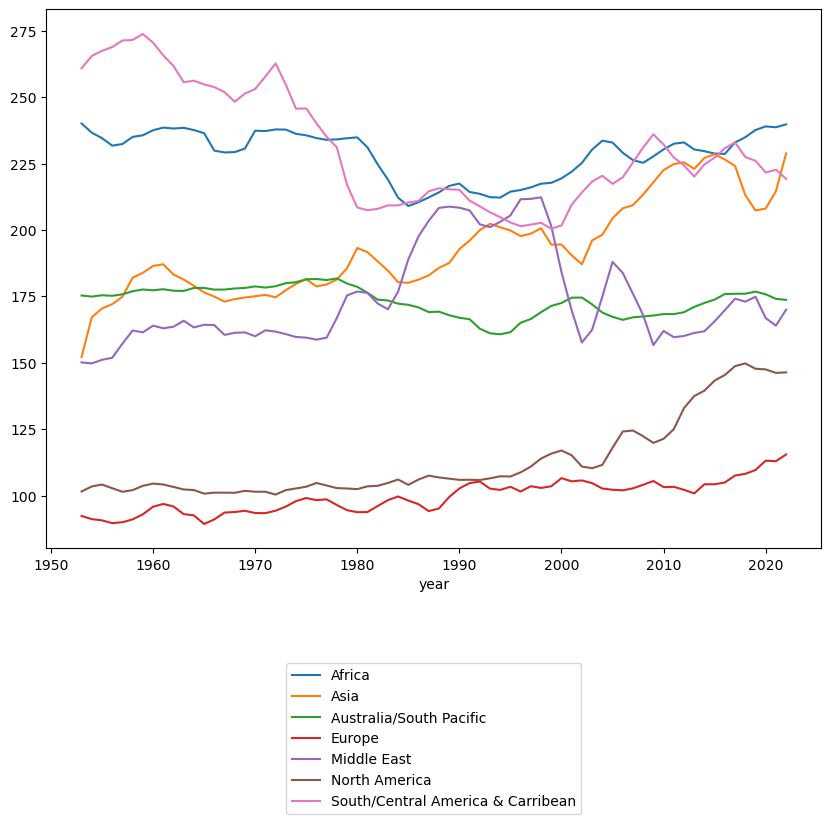

In [24]:
#Solve question here. Briefly justy you solution in the following markdown cell.

fig, axis = plt.subplots()


extData["tavg"]=(extData["tmax"]+extData["tmin"])/2
extData["year"]=extData["date"].dt.year
data = extData[["region","year","tavg"]].groupby(["region","year"]).mean()
data = data.unstack(0)
data = data.rolling(4,center=False).mean()
data.columns=data.columns.get_level_values(1)
data.plot(ax=axis)
axis.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))



**Rationale:** to be completed

### 4.3 There are regions and regions...

The defined regions span a wide range of latitudes, that include areas with quite different weather conditions. For studying the evolution of weather in different regions, there could be other ways of grouping the weather stations.

Propose one such method and compute and plot the information with the given grouping.


<Axes: xlabel='year'>

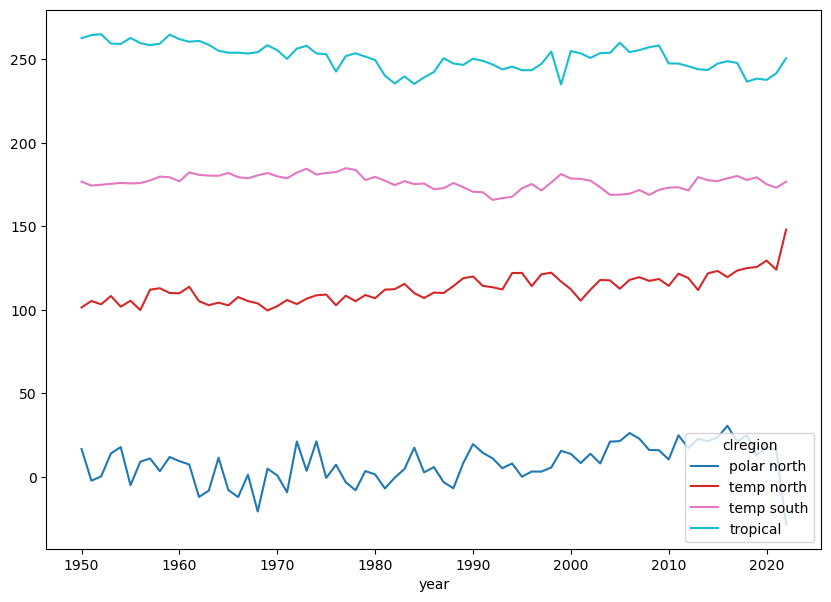

In [17]:
#Solve question here. Briefly justify you solution in the following markdown cell.

extData2 = extData.copy()

extData2["clregion"] = np.where((extData2["lat"] < 23.44) & (extData2["lat"] > -23.44), "tropical",
                                np.where((extData2["lat"] >= 23.44) & (extData2["lat"] < 66.56), "temp north",
                                np.where((extData2["lat"] >= 66.56), "polar north",
                                np.where((extData2["lat"] <= -23.44) & (extData2["lat"] > -66.56), "temp south",
                                np.where((extData2["lat"] <= -66.56), "polar south",
                                         "other")))))

data = extData2[["clregion","year","tavg"]].groupby(["clregion","year"]).mean()
data = data.unstack(0)
data.columns=data.columns.get_level_values(1)
data.plot(colormap="tab10")

**Rationale:** to be completed